In [1]:
import networkx as nx
import metis
G = metis.example_networkx()
(edgecuts, parts) = metis.part_graph(G, 3)
colors = ['red','blue','green']
for i, p in enumerate(parts):
     G.node[i]['color'] = colors[p]

In [2]:
G.node

{0: {'color': 'red'},
 1: {'color': 'red'},
 2: {'color': 'red'},
 3: {'color': 'red'},
 4: {'color': 'red'},
 5: {'color': 'red'},
 6: {'color': 'blue'},
 7: {'color': 'green'},
 8: {'color': 'green'},
 9: {'color': 'green'},
 10: {'color': 'green'},
 11: {'color': 'green'},
 12: {'color': 'green'},
 13: {'color': 'blue'},
 14: {'color': 'blue'},
 15: {'color': 'blue'},
 16: {'color': 'blue'},
 17: {'color': 'blue'},
 18: {'color': 'blue'}}

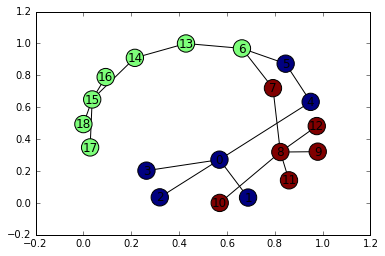

In [13]:
%matplotlib inline
nx.draw_networkx(G, node_color=parts)
#(G, 'example.dot') # Requires pydot or pygraphviz

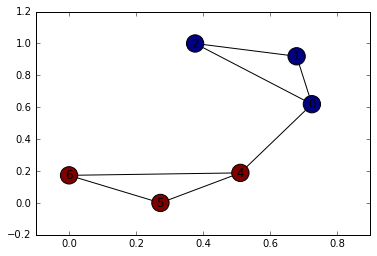

In [19]:
g2 = nx.Graph([(0,1), (0,2), (1,2), (0,4), (4,5), (4,6), (5,6)])
p2 = metis.part_graph(g2,2)
nx.draw_networkx(g2, node_color=p2[1])

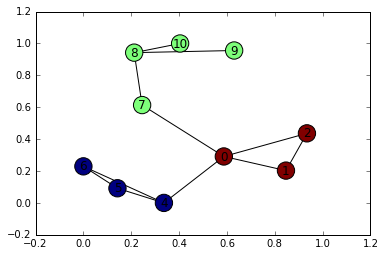

In [23]:
g3 = nx.Graph([(0,1), (0,2), (1,2), (0,4), 
               (4,5), (4,6), (5,6),
               (0, 7), (7, 8), (8,9), (8, 10)])
nx.draw_networkx(g3, node_color=metis.part_graph(g3,3)[1])

In [11]:
?nx.draw_networkx